In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# Visualize results of Data augmentation with DL

In [2]:
import pandas as pd
import seaborn as sns
import os
%matplotlib inline
import matplotlib.pyplot as plt
from textwrap import wrap
import pickle as pkl
import itertools
import glob
import numpy as np

In [3]:
sRoot='/project/bioinformatics/DLLab/Cooper/Code/AutismProject/Parallelization/TrainedModels/Augmented'

In [4]:
lsAugMethods=glob.glob(f'{sRoot}/*')
lsAugMethods

['/project/bioinformatics/DLLab/Cooper/Code/AutismProject/Parallelization/TrainedModels/Augmented/ICADecomposition_FinaltimeseriesNoise_10000xAugmented',
 '/project/bioinformatics/DLLab/Cooper/Code/AutismProject/Parallelization/TrainedModels/Augmented/ICADecomposition_ComponentsNoise_500xAugmented_Windowed',
 '/project/bioinformatics/DLLab/Cooper/Code/AutismProject/Parallelization/TrainedModels/Augmented/ICADecomposition_FinaltimeseriesNoise_1000xAugmented',
 '/project/bioinformatics/DLLab/Cooper/Code/AutismProject/Parallelization/TrainedModels/Augmented/PCADecomposition_NoneNoise_10000xAugmented',
 '/project/bioinformatics/DLLab/Cooper/Code/AutismProject/Parallelization/TrainedModels/Augmented/PCADecomposition_NoneNoise_1000xAugmented_Windowed',
 '/project/bioinformatics/DLLab/Cooper/Code/AutismProject/Parallelization/TrainedModels/Augmented/ICADecomposition_BothNoise_5000xAugmented',
 '/project/bioinformatics/DLLab/Cooper/Code/AutismProject/Parallelization/TrainedModels/Augmented/PCA

In [5]:
dResults={}

In [6]:
pkl.load(open('/project/bioinformatics/DLLab/Cooper/Code/AutismProject/Parallelization/TrainedModels/Augmented/ICADecomposition_FinaltimeseriesNoise_10000xAugmented/Dense_08Dense_History_CV0.p', 'rb'))

Using Theano backend.
WARNING (theano.configdefaults): install mkl with `conda install mkl-service`: No module named 'mkl'
/project/bioinformatics/DLLab/shared/CondaEnvironments/CooperAutismTF_GPU_v5/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/project/bioinformatics/DLLab/shared/CondaEnvironments/CooperAutismTF_GPU_v5/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/project/bioinformatics/DLLab/shared/CondaEnvironments/CooperAutismTF_GPU_v5/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarn

In [7]:
import keras

In [8]:
for sAugMethod in lsAugMethods:
    dResults[sAugMethod.split('/')[-1]]={}
    for iCV in range(3):
        sFile=f'{sAugMethod}/Dense_08Dense_History_CV{iCV}.p'
        print(sFile)
        try:
            dResults[sAugMethod.split('/')[-1]][iCV]=pkl.load(open(sFile, 'rb'))
        except:
            dResults[sAugMethod.split('/')[-1]][iCV]=0

/project/bioinformatics/DLLab/Cooper/Code/AutismProject/Parallelization/TrainedModels/Augmented/ICADecomposition_FinaltimeseriesNoise_10000xAugmented/Dense_08Dense_History_CV0.p
/project/bioinformatics/DLLab/Cooper/Code/AutismProject/Parallelization/TrainedModels/Augmented/ICADecomposition_FinaltimeseriesNoise_10000xAugmented/Dense_08Dense_History_CV1.p
/project/bioinformatics/DLLab/Cooper/Code/AutismProject/Parallelization/TrainedModels/Augmented/ICADecomposition_FinaltimeseriesNoise_10000xAugmented/Dense_08Dense_History_CV2.p
/project/bioinformatics/DLLab/Cooper/Code/AutismProject/Parallelization/TrainedModels/Augmented/ICADecomposition_ComponentsNoise_500xAugmented_Windowed/Dense_08Dense_History_CV0.p
/project/bioinformatics/DLLab/Cooper/Code/AutismProject/Parallelization/TrainedModels/Augmented/ICADecomposition_ComponentsNoise_500xAugmented_Windowed/Dense_08Dense_History_CV1.p
/project/bioinformatics/DLLab/Cooper/Code/AutismProject/Parallelization/TrainedModels/Augmented/ICADecompo

/project/bioinformatics/DLLab/Cooper/Code/AutismProject/Parallelization/TrainedModels/Augmented/PCADecomposition_NoneNoise_500xAugmented_Windowed/Dense_08Dense_History_CV2.p
/project/bioinformatics/DLLab/Cooper/Code/AutismProject/Parallelization/TrainedModels/Augmented/ICADecomposition_NoneNoise_1000xAugmented_Windowed/Dense_08Dense_History_CV0.p
/project/bioinformatics/DLLab/Cooper/Code/AutismProject/Parallelization/TrainedModels/Augmented/ICADecomposition_NoneNoise_1000xAugmented_Windowed/Dense_08Dense_History_CV1.p
/project/bioinformatics/DLLab/Cooper/Code/AutismProject/Parallelization/TrainedModels/Augmented/ICADecomposition_NoneNoise_1000xAugmented_Windowed/Dense_08Dense_History_CV2.p
/project/bioinformatics/DLLab/Cooper/Code/AutismProject/Parallelization/TrainedModels/Augmented/ICADecomposition_FinaltimeseriesNoise_1000xAugmented_Windowed/Dense_08Dense_History_CV0.p
/project/bioinformatics/DLLab/Cooper/Code/AutismProject/Parallelization/TrainedModels/Augmented/ICADecomposition_Fi

/project/bioinformatics/DLLab/Cooper/Code/AutismProject/Parallelization/TrainedModels/Augmented/PCADecomposition_FinaltimeseriesNoise_10000xAugmented/Dense_08Dense_History_CV1.p
/project/bioinformatics/DLLab/Cooper/Code/AutismProject/Parallelization/TrainedModels/Augmented/PCADecomposition_FinaltimeseriesNoise_10000xAugmented/Dense_08Dense_History_CV2.p
/project/bioinformatics/DLLab/Cooper/Code/AutismProject/Parallelization/TrainedModels/Augmented/PCADecomposition_ComponentsNoise_10000xAugmented/Dense_08Dense_History_CV0.p
/project/bioinformatics/DLLab/Cooper/Code/AutismProject/Parallelization/TrainedModels/Augmented/PCADecomposition_ComponentsNoise_10000xAugmented/Dense_08Dense_History_CV1.p
/project/bioinformatics/DLLab/Cooper/Code/AutismProject/Parallelization/TrainedModels/Augmented/PCADecomposition_ComponentsNoise_10000xAugmented/Dense_08Dense_History_CV2.p
/project/bioinformatics/DLLab/Cooper/Code/AutismProject/Parallelization/TrainedModels/Augmented/ICADecomposition_NoneNoise_25

/project/bioinformatics/DLLab/Cooper/Code/AutismProject/Parallelization/TrainedModels/Augmented/ICADecomposition_ComponentsNoise_25000xAugmented/Dense_08Dense_History_CV1.p
/project/bioinformatics/DLLab/Cooper/Code/AutismProject/Parallelization/TrainedModels/Augmented/ICADecomposition_ComponentsNoise_25000xAugmented/Dense_08Dense_History_CV2.p


In [9]:
dResults

{'ICADecomposition_FinaltimeseriesNoise_10000xAugmented': {0: <keras.callbacks.callbacks.History at 0x2aab47b26d68>,
  1: <keras.callbacks.callbacks.History at 0x2aaab4ed5c88>,
  2: <keras.callbacks.callbacks.History at 0x2aaab681cba8>},
 'ICADecomposition_ComponentsNoise_500xAugmented_Windowed': {0: <keras.callbacks.callbacks.History at 0x2aab16842860>,
  1: <keras.callbacks.callbacks.History at 0x2aab16842b00>,
  2: <keras.callbacks.callbacks.History at 0x2aab16842da0>},
 'ICADecomposition_FinaltimeseriesNoise_1000xAugmented': {0: <keras.callbacks.callbacks.History at 0x2aab16842ac8>,
  1: <keras.callbacks.callbacks.History at 0x2aab168422e8>,
  2: <keras.callbacks.callbacks.History at 0x2aab16842320>},
 'PCADecomposition_NoneNoise_10000xAugmented': {0: <keras.callbacks.callbacks.History at 0x2aab168425f8>,
  1: <keras.callbacks.callbacks.History at 0x2aab16842d68>,
  2: <keras.callbacks.callbacks.History at 0x2aab1686ada0>},
 'PCADecomposition_NoneNoise_1000xAugmented_Windowed': {0:

In [10]:
sType=list(dResults.keys())[0]
iCV=0

In [11]:
def fSmooth(aArray):
   
    import scipy as sp
    
    aSig=sp.ndimage.gaussian_filter(aArray, 5)
    
    return aSig

In [12]:
def fPlotTraining(dSingleResult, sTitle, sSaveLoc):

    iMinLen=min([len(np.array(dSingleResult[0].history['val_acc'])),
                 len(np.array(dSingleResult[1].history['val_acc'])),
                 len(np.array(dSingleResult[2].history['val_acc']))])
    aValAcc=(np.array(dSingleResult[0].history['val_acc'])[:iMinLen]+ np.array(dSingleResult[1].history['val_acc'])[:iMinLen]+ np.array(dSingleResult[2].history['val_acc'])[:iMinLen])/3.0
    aAcc=(np.array(dSingleResult[0].history['acc'][:iMinLen])+ np.array(dSingleResult[1].history['acc'])[:iMinLen]+ np.array(dSingleResult[2].history['acc'])[:iMinLen])/3.0

    
    if True:#np.max(aValAcc)>0.75 and np.max(fSmooth(aValAcc))>0.75:
        plt.plot(range(len(aValAcc)), fSmooth(aValAcc))
        plt.plot(range(len(aAcc)), fSmooth(aAcc))

        print(f'Max Validation Acc: {np.max(aValAcc)}')
        print(f'Max Smoothed Validation Acc: {np.max(fSmooth(aValAcc))}')


        plt.title(f'{sTitle} Acc \n Max Validation Acc: {np.max(aValAcc)} \n Max Smoothed Validation Acc: {np.max(fSmooth(aValAcc))}')
        plt.tight_layout()
        #plt.savefig(f'{sSaveLoc}/{sTitle}.png')
        plt.show()


In [13]:
sSaveLoc='/project/bioinformatics/DLLab/Cooper/Code/AutismProject/Parallelization/Images/DL_Aug_Comparison_Windowed'

Max Validation Acc: 0.7028985619544983
Max Smoothed Validation Acc: 0.6832215187484323


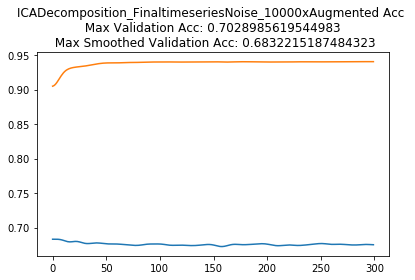

Max Validation Acc: 0.6340579787890116
Max Smoothed Validation Acc: 0.6115128132303259


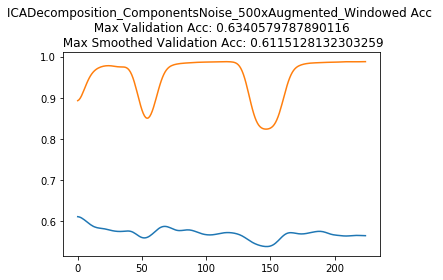

Max Validation Acc: 0.6775362491607666
Max Smoothed Validation Acc: 0.653058648963797


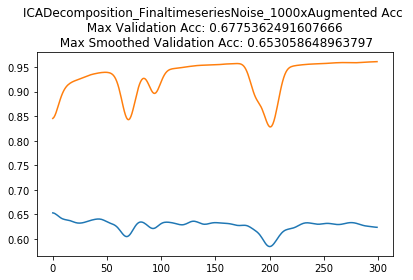

Max Validation Acc: 0.782608687877655
Max Smoothed Validation Acc: 0.7688125868280695


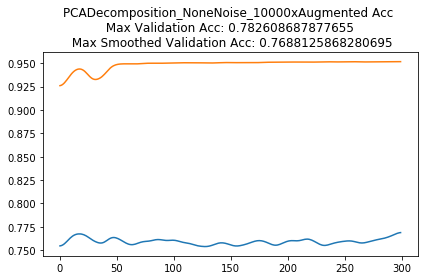

Max Validation Acc: 0.7137681245803833
Max Smoothed Validation Acc: 0.6715882850167699


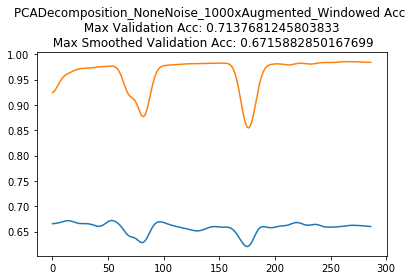

Max Validation Acc: 0.717391312122345
Max Smoothed Validation Acc: 0.6866366980933223


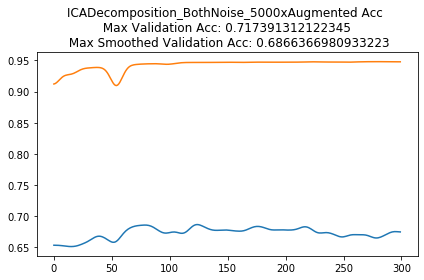

Max Validation Acc: 0.7971014380455017
Max Smoothed Validation Acc: 0.7847868857458332


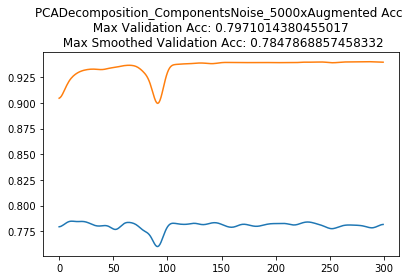

AttributeError: 'int' object has no attribute 'history'

In [14]:
for sType in dResults.keys():
    fPlotTraining(dResults[sType], f'{sType}', sSaveLoc)

In [67]:
pdWindowedResults=pd.DataFrame(columns=['Augmentation Method', 'Noise in timeseries', 'Noise in components',
       'Number of additional samples', 'Train AUC ROC', 'Train std. error',
       'Validation AUC ROC', 'Validation std. error', 'Test AUC ROC',
       'Generalization Error', 'Noise', 'Generalization Error Te', 'Windowed'])

In [ ]:
for sAugMethod in lsAugMethods:
    dResults[sAugMethod.split('/')[-1]]={}
    for iCV in range(3):
        sFile=f'{sAugMethod}/Dense_08Dense_History_CV{iCV}.p'
        print(sFile)
        try:
            dResults[sAugMethod.split('/')[-1]][iCV]=pkl.load(open(sFile, 'rb'))
        except:
            dResults[sAugMethod.split('/')[-1]][iCV]=0

In [27]:
idx=dResults['PCADecomposition_NoneNoise_10000xAugmented_Windowed'][0].history['acc'].index(max(dResults['PCADecomposition_NoneNoise_10000xAugmented_Windowed'][0].history['acc']))

148

In [ ]:
# def fAvgHist(dHistory, sType):
#     for sKey in cHistory.history.keys():
#         idMax=dHistory[iCV].history['acc'].index(max(dHistory[iCV].history['acc']))
#         flAcc=dHistory[iCV].history['acc'][idMax]
#         flCVAcc=dHistory[iCV].history['val_acc'][idMax]


        

In [37]:
def fLoad(sKey, sTrValTe):
    sRoot=os.path.join('/project/bioinformatics/DLLab/Cooper/Code/AutismProject/Parallelization/TrainedModels/Augmented/', sKey)
    if sTrValTe=='Tr':
        lsFiles=[f'Dense_08Dense_TrROCScore_CV{iCV}.p' for iCV in range(3)]
    elif sTrValTe=='Val':
        lsFiles=[f'Dense_08Dense_ROCScore_CV{iCV}.p' for iCV in range(3)]
    elif sTrValTe=='Te':
        lsFiles=[f'Dense_08Dense_ROCScore_Full.p']
    
    aData=np.zeros((len(lsFiles)))
    for i, sFile in enumerate(lsFiles):
        try:
            aData[i]=pkl.load(open(os.path.join(sRoot, sFile),'rb'))
        except:
            aData[i]=0
    aData=aData[np.nonzero(aData)]
    return np.mean(aData), np.std(aData)

In [38]:
def fNoise(sKey):
    if 'Both' in sKey:
        return 'Both'
    elif 'Finaltimeseries' in sKey:
        return 'Timeseries'
    elif 'Components' in sKey:
        return 'Components'
    else:
        return 'None'

In [68]:
pdWindowedResults

,Augmentation Method,Noise in timeseries,Noise in components,Number of additional samples,Train AUC ROC,Train std. error,Validation AUC ROC,Validation std. error,Test AUC ROC,Generalization Error,Noise,Generalization Error Te,Windowed


In [69]:
iCol=0
for sKey in dResults.keys():
    if 'Windowed' in sKey:
        print(sKey)
        pdWindowedResults=pdWindowedResults.append(pd.Series(name=iCol))
        pdWindowedResults.loc[iCol]['Augmentation Method']=sKey[0:3]
        pdWindowedResults.loc[iCol]['Noise in timeseries']='None' if not (('Both' in sKey) or ('Finaltimeseries' in sKey)) else 'Present'
        pdWindowedResults.loc[iCol]['Noise in components']='None' if not (('Both' in sKey) or ('Components' in sKey)) else 'Present'
        pdWindowedResults.loc[iCol]['Number of additional samples']=int(sKey.split('_')[-2].strip('xAugmented'))
        pdWindowedResults.loc[iCol]['Train AUC ROC'], pdWindowedResults.iloc[iCol]['Train std. error']=fLoad(sKey, 'Tr')
        pdWindowedResults.loc[iCol]['Validation AUC ROC'], pdWindowedResults.iloc[iCol]['Validation std. error']=fLoad(sKey, 'Val')
        pdWindowedResults.loc[iCol]['Test AUC ROC'], _=fLoad(sKey, 'Te')
        pdWindowedResults.loc[iCol]['Generalization Error']=  pdWindowedResults.iloc[iCol]['Train AUC ROC'] - pdWindowedResults.iloc[iCol]['Validation AUC ROC']
        pdWindowedResults.loc[iCol]['Noise']=fNoise(sKey)
        pdWindowedResults.loc[iCol]['Generalization Error Te']=pdWindowedResults.iloc[iCol]['Validation AUC ROC']-pdWindowedResults.iloc[iCol]['Test AUC ROC']
        pdWindowedResults.loc[iCol]['Windowed']=1
        iCol+=1

ICADecomposition_ComponentsNoise_500xAugmented_Windowed
PCADecomposition_NoneNoise_1000xAugmented_Windowed
PCADecomposition_NoneNoise_10000xAugmented_Windowed
PCADecomposition_FinaltimeseriesNoise_500xAugmented_Windowed
PCADecomposition_ComponentsNoise_500xAugmented_Windowed
PCADecomposition_BothNoise_500xAugmented_Windowed
ICADecomposition_BothNoise_5000xAugmented_Windowed
PCADecomposition_NoneNoise_5000xAugmented_Windowed
ICADecomposition_BothNoise_1000xAugmented_Windowed
PCADecomposition_BothNoise_5000xAugmented_Windowed
PCADecomposition_NoneNoise_500xAugmented_Windowed
ICADecomposition_NoneNoise_1000xAugmented_Windowed
ICADecomposition_FinaltimeseriesNoise_1000xAugmented_Windowed
PCADecomposition_ComponentsNoise_1000xAugmented_Windowed
PCADecomposition_ComponentsNoise_5000xAugmented_Windowed
PCADecomposition_BothNoise_50000xAugmented_Windowed
ICADecomposition_FinaltimeseriesNoise_500xAugmented_Windowed
PCADecomposition_BothNoise_1000xAugmented_Windowed
ICADecomposition_ComponentsNo

In [72]:
os.path.isdir('/project/bioinformatics/DLLab/Cooper/Code/AutismProject/Parallelization/DataAugmentation')

True

In [74]:
pkl.dump(pdWindowedResults, open('/project/bioinformatics/DLLab/Cooper/Code/AutismProject/Parallelization/DataAugmentation/pdWindowedTestResults.p','wb'))

In [16]:
fPlotTraining(dResults[lsTypes[1]], f'{lsTypes[1]}', sSaveLoc)


NameError: name 'lsTypes' is not defined

In [17]:
dOrig={}
for iOrig in range(3):
    dOrig[iOrig]={}
    for iCV in range(3):
        sPath=f'/project/bioinformatics/DLLab/Cooper/Code/AutismProject/Parallelization/TrainedModels/Augmented/Original_trial{iOrig}/Dense_08connectivitybasc122ModelHistoryCrossVal{iCV+1}.p'
        dOrig[iCV]=pkl.load(open(sPath,'rb'))

In [18]:
dOrig[0].history

{'val_loss': [7.322493076324463,
  1.1592755317687988,
  8.202132225036621,
  2.227294683456421,
  1.1834397315979004,
  1.1637121438980103,
  1.1657463312149048,
  1.1682109832763672,
  1.171319842338562,
  1.1746397018432617,
  1.176416039466858,
  1.1777946949005127,
  1.1760709285736084,
  1.173946499824524,
  1.170520305633545,
  1.1650965213775635,
  1.1600666046142578,
  1.1538598537445068,
  1.1462351083755493,
  1.1402249336242676,
  1.1317225694656372,
  1.1239043474197388,
  1.1166738271713257,
  1.1088367700576782,
  1.1019163131713867,
  1.094038724899292,
  1.0859869718551636,
  1.078148365020752,
  1.0707002878189087,
  1.0650886297225952,
  1.0581907033920288,
  1.0521639585494995,
  1.046279788017273,
  1.0405710935592651,
  1.0349169969558716,
  1.0305169820785522,
  1.0254898071289062,
  1.0204819440841675,
  1.0168439149856567,
  1.0132428407669067,
  1.0101094245910645,
  1.005160927772522,
  1.0025146007537842,
  1.001099944114685,
  0.9971833825111389,
  0.995052

Max Validation Acc: 0.6721311211585999
Max Smoothed Validation Acc: 0.6620343230326226


FileNotFoundError: [Errno 2] No such file or directory: '/project/bioinformatics/DLLab/Cooper/Code/AutismProject/Parallelization/Images/DL_Aug_Comparison_Windowed/Original_trial3.png'

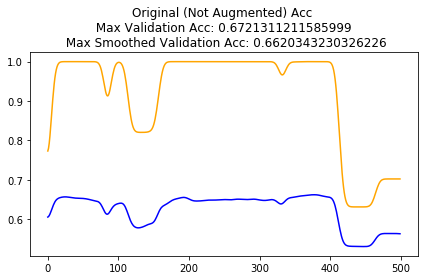

In [19]:
aValAcc0=np.array(dOrig[0].history['val_acc'])
aValAcc1=np.array(dOrig[1].history['val_acc'])
aValAcc2=np.array(dOrig[2].history['val_acc'])
aMeanValAcc=(aValAcc0+aValAcc2+aValAcc2)/3.0

aAcc0=np.array(dOrig[0].history['acc'])
aAcc1=np.array(dOrig[1].history['acc'])
aAcc2=np.array(dOrig[2].history['acc'])
aMeanAcc=(aAcc0+aAcc2+aAcc2)/3.0
    
# plt.plot(range(len(aValAcc0)), fSmooth(aValAcc0), 'orange')
# plt.plot(range(len(aValAcc1)), fSmooth(aValAcc1), 'orange')
# plt.plot(range(len(aValAcc2)), fSmooth(aValAcc2), 'orange')
plt.plot(range(len(aMeanValAcc)), fSmooth(aMeanValAcc), 'blue')
# plt.plot(range(len(aAcc0)), fSmooth(aAcc0), 'blue')
# plt.plot(range(len(aAcc1)), fSmooth(aAcc1), 'blue')
# plt.plot(range(len(aAcc2)), fSmooth(aAcc2), 'blue')
plt.plot(range(len(aMeanAcc)), fSmooth(aMeanAcc), 'orange')

print(f'Max Validation Acc: {np.max(aMeanValAcc)}')
print(f'Max Smoothed Validation Acc: {np.max(fSmooth(aMeanValAcc))}')


plt.title(f'Original (Not Augmented) Acc \n Max Validation Acc: {np.max(aMeanValAcc)} \n Max Smoothed Validation Acc: {np.max(fSmooth(aMeanValAcc))}')
plt.tight_layout()
plt.savefig(f'{sSaveLoc}/Original_trial3.png')

In [20]:
pdViolinPlotData=pd.DataFrame(columns=['Additional Samples', 'Decomp Method', 'Noise', 'Cross Val Fold', 'Tr/Val', 'Max Acc', 'Min Loss', 'Max smoothed Acc', 'Min smoothed Loss'])
pdViolinPlotData

,Additional Samples,Decomp Method,Noise,Cross Val Fold,Tr/Val,Max Acc,Min Loss,Max smoothed Acc,Min smoothed Loss


In [21]:
pdViolinPlotData.loc[0]=[0,'N/A', 'N/A', 0, 'Tr', np.max(np.array(dOrig[0].history['acc'])), np.min(np.array(dOrig[0].history['loss'])), np.max(fSmooth(np.array(dOrig[0].history['acc']))), fSmooth(np.min(np.array(dOrig[0].history['loss'])))]
pdViolinPlotData.loc[1]=[0,'N/A', 'N/A', 1, 'Tr', np.max(np.array(dOrig[1].history['acc'])), np.min(np.array(dOrig[1].history['loss'])), np.max(fSmooth(np.array(dOrig[1].history['acc']))), fSmooth(np.min(np.array(dOrig[1].history['loss'])))]
pdViolinPlotData.loc[2]=[0,'N/A', 'N/A', 2, 'Tr', np.max(np.array(dOrig[2].history['acc'])), np.min(np.array(dOrig[2].history['loss'])), np.max(fSmooth(np.array(dOrig[2].history['acc']))), fSmooth(np.min(np.array(dOrig[2].history['loss'])))]
pdViolinPlotData.loc[3]=[0,'N/A', 'N/A', 0, 'Val', np.max(np.array(dOrig[0].history['val_acc'])), np.min(np.array(dOrig[0].history['val_loss'])), np.max(fSmooth(np.array(dOrig[0].history['val_acc']))), fSmooth(np.min(np.array(dOrig[0].history['val_loss'])))]
pdViolinPlotData.loc[4]=[0,'N/A', 'N/A', 1, 'Val', np.max(np.array(dOrig[1].history['val_acc'])), np.min(np.array(dOrig[1].history['val_loss'])), np.max(fSmooth(np.array(dOrig[1].history['val_acc']))), fSmooth(np.min(np.array(dOrig[1].history['val_loss'])))]
pdViolinPlotData.loc[5]=[0,'N/A', 'N/A', 2, 'Val', np.max(np.array(dOrig[2].history['val_acc'])), np.min(np.array(dOrig[2].history['val_loss'])), np.max(fSmooth(np.array(dOrig[2].history['val_acc']))), fSmooth(np.min(np.array(dOrig[2].history['val_loss'])))]

In [22]:
pdViolinPlotData

,Additional Samples,Decomp Method,Noise,Cross Val Fold,Tr/Val,Max Acc,Min Loss,Max smoothed Acc,Min smoothed Loss
0,0,N/A,N/A,0,Tr,1.000000,0.059637,1.000000,0.059636738151311874
1,0,N/A,N/A,1,Tr,1.000000,0.072203,1.000000,0.07220292463898659
2,0,N/A,N/A,2,Tr,1.000000,0.081005,1.000000,0.0810052789747715
3,0,N/A,N/A,0,Val,0.684426,0.826843,0.676830,0.8268433809280396
4,0,N/A,N/A,1,Val,0.704918,0.814099,0.697700,0.8140985369682312
5,0,N/A,N/A,2,Val,0.672131,0.812105,0.661019,0.8121050000190735
